In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import warnings; warnings.simplefilter('ignore')
import sys
import h5py
import pandas as pd
import seaborn as sns
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_ancillary
import jsm_visualize
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models
import evolve as ev
import galhalo as gh
import profiles as profiles
import config as cfg
import os

In [3]:
plt.style.use('../../../SatGen/notebooks/paper1/paper.mplstyle')
double_textwidth = 7.0 #inches
single_textwidth = 3.5 #inches
levelz = [1-0.99, 1-0.95, 1-0.68]

In [4]:
halo_smooth = np.linspace(11, 14, 100)

In [5]:
dfs = []

for file in os.listdir("../../data/DF_down/"):

    if file.endswith("h5"):

        ii = jsm_ancillary.load_sample("../../data/DF_down/" + file)
        print("loaded", file)

        df = pd.DataFrame({
            "log_Mhost": np.log10(ii.host_mass.values),
            "log_a50": np.log10(1 / (1 + ii.host_z50.values)),
            "log_Ncut": np.log10(ii.N_cut.values),
            "log_NRvircut": np.log10(ii.N_Rvircut.values),
            "log_Nartcut": np.log10(ii.N_artcut.values)})

        dfs.append(df)

test = pd.concat(dfs, ignore_index=True)

loaded 11.2_files.h5
loaded 11.8_files.h5
loaded 13.4_files.h5
loaded 12.6_files.h5
loaded 13.2_files.h5
loaded 12.0_files.h5
loaded 13.8_files.h5
loaded 11.4_files.h5
loaded 12.4_files.h5
loaded 14.0_files.h5
loaded 13.6_files.h5
loaded 11.0_files.h5
loaded 11.6_files.h5
loaded 12.2_files.h5
loaded 13.0_files.h5
loaded 12.8_files.h5


In [6]:
satgen_high_mass = test[test["log_Mhost"] > 12.5]
satgen_high_mass = satgen_high_mass.sort_values("log_Mhost")

median_a50 = []
median_Nsub = []
median_Nsub_Rvir = []
median_Nsub_art = []

delta_a50_sg_median = []
delta_Nsub_sg_median = []


for mass_bin in np.unique(satgen_high_mass["log_Mhost"]):
    subsample = satgen_high_mass["log_Mhost"] == mass_bin
    
    med_a50_i = np.median(satgen_high_mass["log_a50"][subsample])
    median_a50.append(med_a50_i)
    delta_a50_sg_median.extend(satgen_high_mass["log_a50"][subsample].values - med_a50_i)

    med_Nsub_i = np.median(satgen_high_mass["log_Ncut"][subsample])
    median_Nsub.append(med_Nsub_i)
    delta_Nsub_sg_median.extend(satgen_high_mass["log_Ncut"][subsample].values - med_Nsub_i)

    median_Nsub_Rvir.append(np.median(satgen_high_mass["log_NRvircut"][subsample]))
    median_Nsub_art.append(np.median(satgen_high_mass["log_Nartcut"][subsample]))

delta_a50_sg_median = np.array(delta_a50_sg_median)
delta_Nsub_sg_median = np.array(delta_Nsub_sg_median)

median_a50 = np.array(median_a50)
median_Nsub = np.array(median_Nsub)

In [7]:
halo_smooth = np.linspace(12.5, 14, 100)

def a50_line(log_Mvir, m_a50, b_a50):
    return m_a50*log_Mvir+b_a50

def Nsub_line(log_Mvir,m_Nsub, b_Nsub):
    return m_Nsub*log_Mvir+b_Nsub

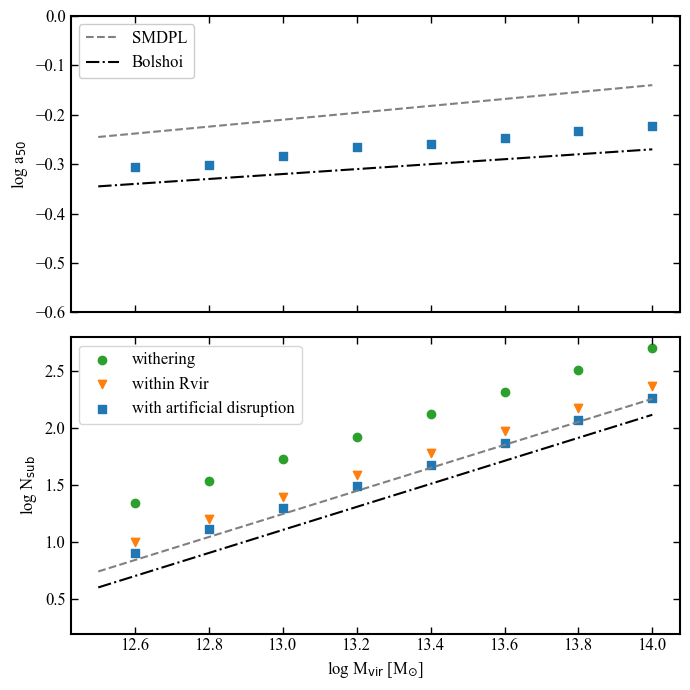

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(double_textwidth, double_textwidth), sharex=True)

# ax[0].scatter(satgen_high_mass["log_Mhost"], satgen_high_mass["log_a50"], color="C0", marker=".", s=1)
ax[0].scatter(np.unique(satgen_high_mass["log_Mhost"]), median_a50, color="C0", marker="s")

ax[0].plot(halo_smooth, a50_line(halo_smooth, 0.07, -1.12), label='SMDPL', ls="--", color="grey")
ax[0].plot(halo_smooth, a50_line(halo_smooth, 0.05, -0.97), label='Bolshoi', ls="-.", color="k")

ax[0].set_ylim(-0.6, 0)
ax[0].legend(loc=2, framealpha=1)

# ax[1].scatter(satgen_high_mass["log_Mhost"], satgen_high_mass["log_Ncut"], color="C2", marker=".", s=1)
ax[1].scatter(np.unique(satgen_high_mass["log_Mhost"]), median_Nsub, label="withering", color="C2")
ax[1].scatter(np.unique(satgen_high_mass["log_Mhost"]), median_Nsub_Rvir, label="within Rvir", marker="v", color="C1")
ax[1].scatter(np.unique(satgen_high_mass["log_Mhost"]), median_Nsub_art, label="with artificial disruption", marker="s", color="C0")

ax[1].plot(halo_smooth, Nsub_line(halo_smooth, 1.01, -11.88), ls="--", color="grey")
ax[1].plot(halo_smooth, Nsub_line(halo_smooth, 1.01, -12.02), ls="-.", color="k")
ax[1].legend()

ax[1].set_xlabel("log M$_{\\rm vir}$ [M$_{\\odot}$]")
ax[0].set_ylabel("log a$_{50}$")
ax[1].set_ylabel("log N$_{\\rm sub}$")
ax[1].set_ylim(0.2, 2.8)

plt.tight_layout()
plt.show()

In [7]:
SatGen_df = pd.DataFrame({"log_Mhost": satgen_high_mass["log_Mhost"], "a_50": satgen_high_mass["log_a50"], "delta_a50": delta_a50_sg_median, "Nsub": satgen_high_mass["log_Nartcut"], "delta_Nsub": delta_Nsub_sg_median})
SatGen_df.to_csv("../../../MassSpec/data/DF_down/summary.csv", index=False)

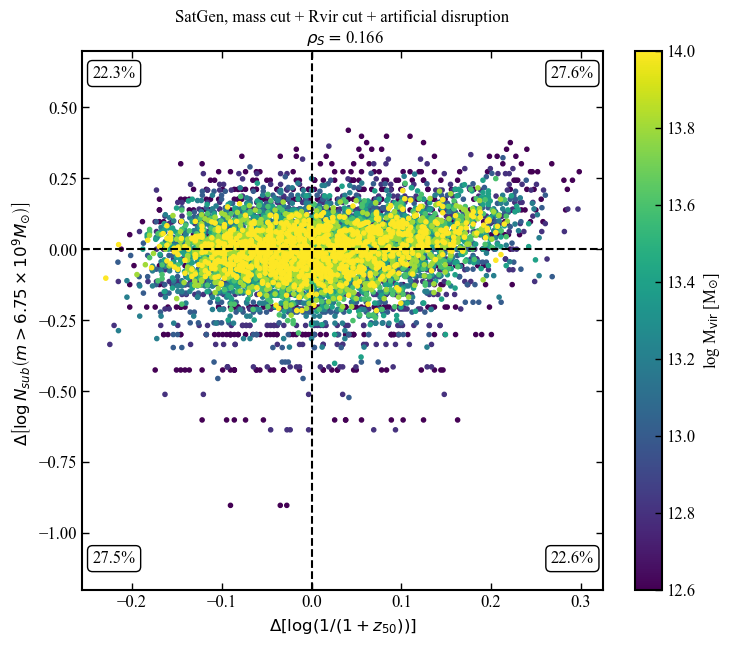

In [8]:
fig, ax = plt.subplots(figsize=(double_textwidth*1.2, double_textwidth))


ax.set_xlabel("$\\Delta [\\log (1/(1+z_{50}))] $")
ax.set_ylabel("$\\Delta \\left[\\log N_{sub} \\left(m > 6.75\\times10^{9} M_{\\odot} \\right) \\right]$  ")

ax.axhline(0, ls="--", color="k", zorder=11)
ax.axvline(0, ls="--", color="k", zorder=11)

qs, rho, pval = jsm_stats.quadrant_percentages_plot(delta_a50_sg_median, delta_Nsub_sg_median)
sm = ax.scatter(delta_a50_sg_median, delta_Nsub_sg_median, c=satgen_high_mass["log_Mhost"], marker=".")
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("log M$_{\\rm vir}$ [M$_{\\odot}$]")

ax.set_title("SatGen, mass cut + Rvir cut + artificial disruption\n $\\rho_S =$"+rho)
ax.text(0.9, 0.95, qs[0], fontsize=12, transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor="white"))
ax.text(0.9, 0.05, qs[1], fontsize=12, transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor="white"))
ax.text(0.02, 0.05, qs[2], fontsize=12, transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor="white"))
ax.text(0.02, 0.95, qs[3], fontsize=12, transform=ax.transAxes, bbox=dict(boxstyle="round", facecolor="white"))
ax.set_ylim(-1.2, 0.7)


plt.show()